## mysql 에 접속하기

In [2]:
1+2

3

In [9]:
!pip install PyMySQL

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import sys
!{sys.executable} -m pip install PyMySQL

     ---------------------------------------- 45.0/45.0 KB 2.2 MB/s eta 0:00:00


You should consider upgrading via the 'c:\Users\user\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [4]:
import pymysql

pymysql.__version__

'1.4.6'

In [5]:
import pymysql
import matplotlib.pyplot as plt

In [6]:
class Database:
    def __init__(self, host, user, password, db, charset='utf8'):
        self.db_config = {
            'host': host,
            'user': user,
            'password': password,
            'db': db,
            'charset': charset
        }
        self.conn = None
        self.cursor = None

    def __enter__(self):
        self.conn = pymysql.connect(**self.db_config)
        self.cursor = self.conn.cursor()
        return self

    def __exit__(self, exc_type, exc_val, exc_tb):
        if self.cursor:
            self.cursor.close()
        if self.conn:
            self.conn.close()

    def fetch_all(self, sql_query):
        self.cursor.execute(sql_query)
        return self.cursor.fetchall()

In [16]:
db_info = {
    'host': 'localhost',
    'user': 'root',
    'password': '0115',
    'db': 'world'
}

sql = """
  SELECT * FROM world.country;
"""

with Database(**db_info) as db:
    query_results = db.fetch_all(sql)
    for row in query_results[:5]:
        print(row)

('ABW', 'Aruba', 'North America', 'Caribbean', Decimal('193.00'), None, 103000, Decimal('78.4'), Decimal('828.00'), Decimal('793.00'), 'Aruba', 'Nonmetropolitan Territory of The Netherlands', 'Beatrix', 129, 'AW')
('AFG', 'Afghanistan', 'Asia', 'Southern and Central Asia', Decimal('652090.00'), 1919, 22720000, Decimal('45.9'), Decimal('5976.00'), None, 'Afganistan/Afqanestan', 'Islamic Emirate', 'Mohammad Omar', 1, 'AF')
('AGO', 'Angola', 'Africa', 'Central Africa', Decimal('1246700.00'), 1975, 12878000, Decimal('38.3'), Decimal('6648.00'), Decimal('7984.00'), 'Angola', 'Republic', 'José Eduardo dos Santos', 56, 'AO')
('AIA', 'Anguilla', 'North America', 'Caribbean', Decimal('96.00'), None, 8000, Decimal('76.1'), Decimal('63.20'), None, 'Anguilla', 'Dependent Territory of the UK', 'Elisabeth II', 62, 'AI')
('ALB', 'Albania', 'Europe', 'Southern Europe', Decimal('28748.00'), 1912, 3401200, Decimal('71.6'), Decimal('3205.00'), Decimal('2500.00'), 'Shqipëria', 'Republic', 'Rexhep Mejdani'


## 실습 문제: 수도 인구 집중도 분석 및 시각화

**설명**: 국가의 총인구 대비 수도의 인구 비율을 '수도 인구 집중도'라고 정의합니다. 이 지표는 국가의 인구가 수도에 얼마나 집중되어 있는지를 보여주는 척도입니다. `country` 테이블과 `city` 테이블의 데이터를 조합하여 국가별 수도 인구 집중도를 계산하고, 집중도가 가장 높은 상위 15개 국가를 산점도로 시각화하여 국가별 인구 분포 특징을 비교 분석합니다.

$$\text{수도 인구 집중도} (\%) = \left( \frac{\text{수도 인구}}{\text{국가 전체 인구}} \right) \times 100$$

**요구사항**:
* **SQL 쿼리 작성**: `country` 테이블과 `city` 테이블을 수도(`Capital`) ID 기준으로 `JOIN`하여 국가명(`Name`), 국가 전체 인구(`Population`), 수도 인구(`Population`)를 조회하는 쿼리를 작성합니다. 단, 두 인구 값이 모두 0보다 큰 데이터만 가져옵니다.
* **인구 집중도 계산**: 조회한 데이터를 바탕으로 각 국가의 '수도 인구 집중도(%)'를 계산하여 `(국가명, 집중도)` 형태의 튜플로 리스트에 저장합니다.
* **상위 15개 국가 정렬 및 필터링**: `lambda` 함수를 활용하여 생성된 리스트를 집중도 기준으로 내림차순 정렬하고, 상위 15개 국가의 데이터만 추출합니다.
* **데이터 시각화**:
    * Matplotlib의 `scatter()` 함수를 사용하여 상위 15개 국가의 수도 인구 집중도를 산점도로 나타냅니다.
    * 그래프의 제목과 X, Y축에 적절한 레이블을 추가합니다.

In [ ]:
sql = """
  select co.Name, (ci.Population/co.Population)*100 as pop
from country co, city ci
where co.code = ci.countrycode
and co.Population > 0
and ci.Population > 0
and co.Capital = ci.ID
order by pop desc
limit 15;
"""

with Database(**db_info) as db:
    query_results = db.fetch_all(sql)
    for row in query_results[:]:
        print(row)

('Singapore', Decimal('112.6362'))
('Gibraltar', Decimal('108.1000'))
('Macao', Decimal('92.4947'))
('Pitcairn', Decimal('84.0000'))
('Saint Pierre and Miquelon', Decimal('82.9714'))
('Falkland Islands', Decimal('81.8000'))
('Palau', Decimal('63.1579'))
('Djibouti', Decimal('60.0313'))
('Cook Islands', Decimal('59.5000'))
('Qatar', Decimal('59.2654'))
('Western Sahara', Decimal('57.6792'))
('Bahamas', Decimal('56.0261'))
('Seychelles', Decimal('53.2468'))
('Cayman Islands', Decimal('51.5789'))
('Holy See (Vatican City State)', Decimal('45.5000'))


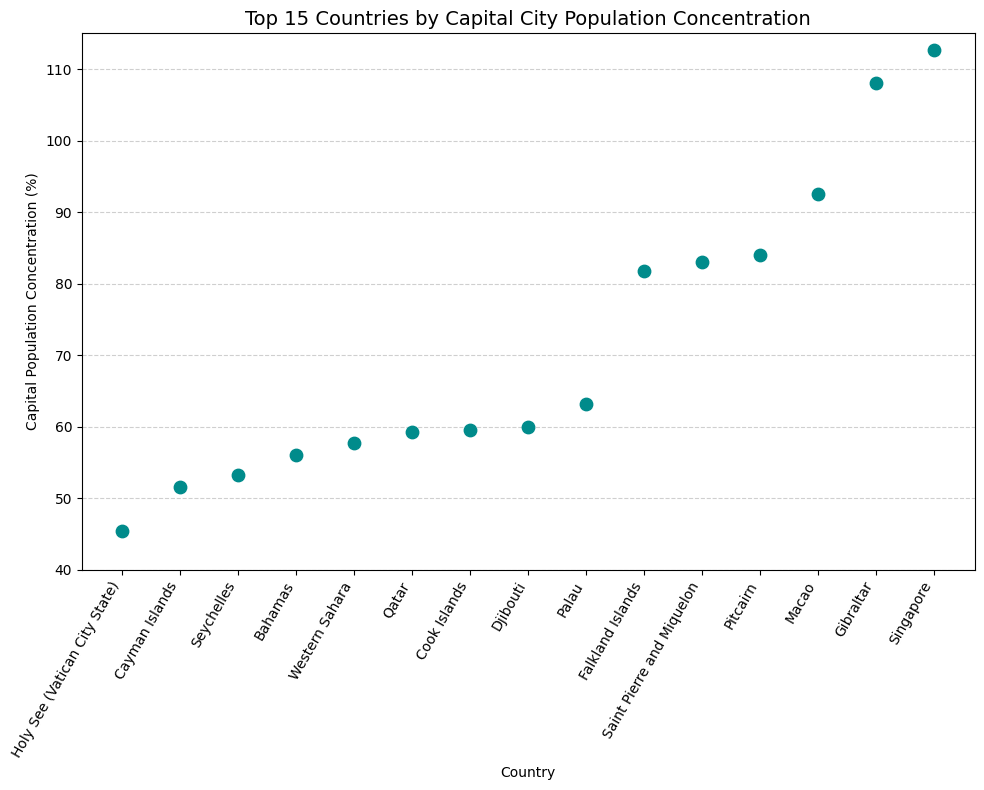

In [32]:
countries =[item[0] for item in query_results]
values = [float(item[1]) for item in query_results]

countries = countries[::-1]
values = values[::-1]

# 그래프의 전체 크기를 설정 (가로 10인치, 세로 8인치)
plt.figure(figsize=(10, 8))

# 3. 산점도(Scatter Plot) 생성
plt.scatter(countries, values, 
            s=80,             # 점(marker)의 크기
            color='darkcyan', # 점의 색상
            zorder=3)         # 점이 격자보다 위에 오도록 z-order 설정

# 4. 그래프 스타일링
# 제목 및 축 레이블 설정
plt.title('Top 15 Countries by Capital City Population Concentration', fontsize=14)
plt.xlabel('Country')
plt.ylabel('Capital Population Concentration (%)')

# y축 범위 설정 (이미지와 유사하게)
plt.ylim(40, 115)

# x축 레이블(국가 이름) 회전
plt.xticks(rotation=60, ha='right')

# y축에만 점선 스타일의 그리드(격자) 추가
plt.grid(axis='y', linestyle='--', alpha=0.6)

# 5. 마무리
# 레이블이 잘리지 않도록 레이아웃 자동 조정
plt.tight_layout()

# 그래프 보여주기
plt.show()



## 실습 문제: 1인당 GNP와 기대수명의 관계 분석 (산점도)

**설명**: 일반적으로 국가의 경제적 수준이 높을수록 국민의 기대수명도 높을 것이라고 예상할 수 있습니다. 이 가설을 데이터로 확인해봅시다. 국가별 '1인당 GNP'를 계산하고, 이 값과 '기대수명' 사이의 관계를 \*\*산점도(Scatter Plot)\*\*로 시각화하여 경제적 풍요와 국민 건강 사이의 연관성을 분석합니다.

$$\text{1인당 GNP} = \frac{\text{GNP} \times 1,000,000}{\text{국가 인구}}$$

**요구사항**:

  * **SQL 쿼리 작성**: `country` 테이블에서 `GNP`, `LifeExpectancy`, `Population` 데이터를 조회하세요. 세 지표 모두 유효한 값(0보다 크거나 `NULL`이 아님)을 가진 데이터만 사용합니다.
  * **1인당 GNP 계산**: 조회된 데이터를 바탕으로 각 국가의 '1인당 GNP'를 계산하세요. `country` 테이블의 GNP는 백만 달러 단위이므로, 실제 GNP 값으로 변환(`GNP * 1,000,000`)한 후 인구로 나누어야 합니다.
  * **데이터 분리**: 계산된 '1인당 GNP' 값과 '기대수명' 값을 각각 별도의 리스트에 저장합니다.
  * **산점도 시각화**: Matplotlib의 `plt.scatter()` 함수를 사용하여 x축은 '1인당 GNP', y축은 '기대수명'으로 하는 산점도를 생성합니다. 그래프의 제목과 축 레이블을 명확하게 설정하여 분석 의도를 잘 나타내세요.


In [37]:
sql = """
select c.Name, c.LifeExpectancy, (c.GNP*1000000)/c.Population
from country c
where c.LifeExpectancy is not null
and c.GNP is not null
and c.Population is not null
limit 200;
"""

with Database(**db_info) as db:
    query_results = db.fetch_all(sql)
    for row in query_results[:]:
        print(row)

('Aruba', Decimal('78.4'), Decimal('8038.834951'))
('Afghanistan', Decimal('45.9'), Decimal('263.028169'))
('Angola', Decimal('38.3'), Decimal('516.229228'))
('Anguilla', Decimal('76.1'), Decimal('7900.000000'))
('Albania', Decimal('71.6'), Decimal('942.314477'))
('Andorra', Decimal('83.5'), Decimal('20897.435897'))
('Netherlands Antilles', Decimal('74.7'), Decimal('8944.700461'))
('United Arab Emirates', Decimal('74.1'), Decimal('15553.461696'))
('Argentina', Decimal('75.1'), Decimal('9187.675524'))
('Armenia', Decimal('66.4'), Decimal('515.056818'))
('American Samoa', Decimal('75.1'), Decimal('4911.764706'))
('Antigua and Barbuda', Decimal('70.5'), Decimal('9000.000000'))
('Australia', Decimal('79.8'), Decimal('18594.832151'))
('Austria', Decimal('77.7'), Decimal('26182.060852'))
('Azerbaijan', Decimal('62.9'), Decimal('533.617792'))
('Burundi', Decimal('46.2'), Decimal('134.876774'))
('Belgium', Decimal('77.8'), Decimal('24387.537845'))
('Benin', Decimal('50.2'), Decimal('386.583566

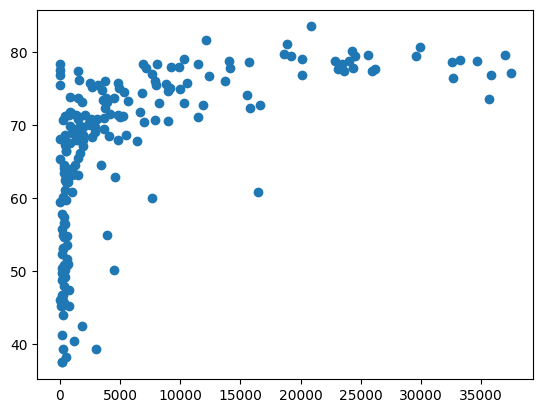

In [40]:
LifeExpectancy =[float(item[1]) for item in query_results]
GNP = [float(item[2]) for item in query_results]

plt.scatter(GNP,LifeExpectancy)


## 실습 문제: 세계 면적 Top 10 국가 시각화 (선 그래프)

**설명**: 세계에서 가장 넓은 영토를 가진 10개 국가는 어디일까요? `country` 테이블에서 국가 면적(`SurfaceArea`)을 기준으로 상위 10개 국가를 찾아, 각 국가의 면적 크기를 순위별로 시각화하여 영토 크기의 차이를 직관적으로 비교해 보세요.

**요구사항**:

  * **SQL 쿼리 작성**: `country` 테이블에서 국가 면적(`SurfaceArea`)을 기준으로 내림차순 정렬(`ORDER BY ... DESC`)하고, 상위 10개(`LIMIT 10`) 국가의 이름(`Name`)과 면적(`SurfaceArea`)을 조회하세요.
  * **데이터 추출 및 변환**: SQL 조회 결과를 가져와, 반복문을 사용해 `country_names` (국가 이름 리스트)와 `surface_areas` (면적 리스트)를 각각 만드세요.
  * **선 그래프 시각화**: Matplotlib의 `plt.plot()` 함수를 사용하여 순위에 따른 면적의 변화를 선 그래프로 나타냅니다. `plt.xticks()`를 활용하여 x축의 눈금을 순위(0\~9) 대신 실제 국가 이름으로 표시하여 가독성을 높이세요.


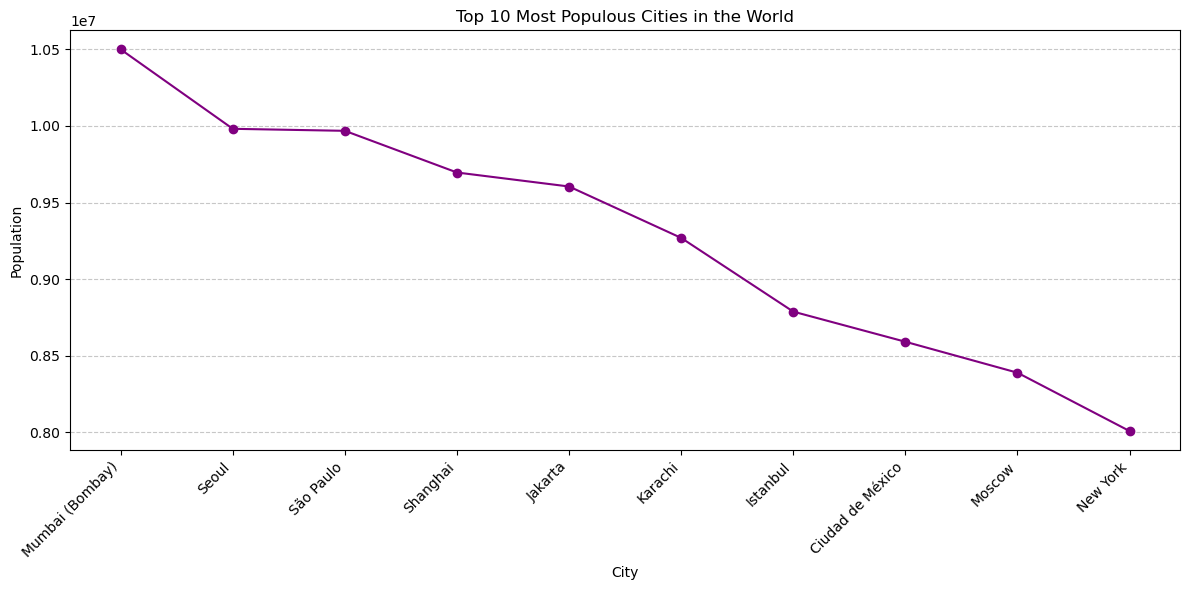